In [ ]:
import pandas as pd

# Assuming 'example.csv' is your uploaded CSV file
file_path = './BBCNewsTrain.csv'

# Read the CSV file into a DataFrame
train_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(train_data.head())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


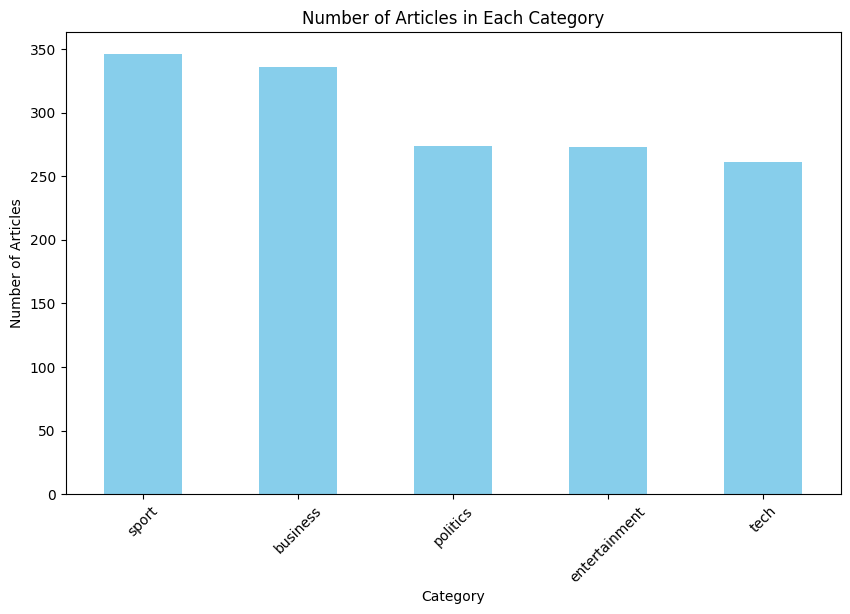

(sport            346
 business         336
 politics         274
 entertainment    273
 tech             261
 Name: Category, dtype: int64,
 count     1490.000000
 mean      2233.461745
 std       1205.153358
 min        501.000000
 25%       1453.000000
 50%       1961.000000
 75%       2751.250000
 max      18387.000000
 Name: text_length, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt

category_counts = train_data['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

train_data['text_length'] = train_data['Text'].apply(len)
text_length_stats = train_data['text_length'].describe()

category_counts, text_length_stats

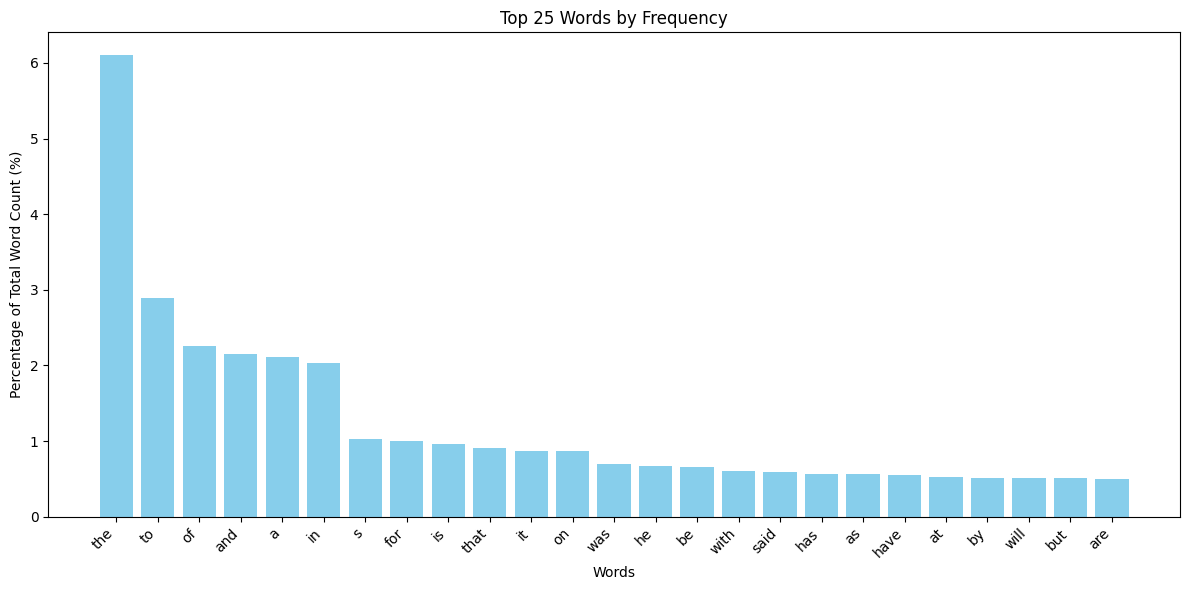

In [ ]:
import numpy as np
frequency = train_data['Text'].str.split(expand=True).unstack().value_counts()
freqplot = frequency[:25] / np.sum(frequency) * 100

plt.figure(figsize=(12, 6))
plt.bar(freqplot.index, freqplot.values, color='skyblue')
plt.title('Top 25 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Percentage of Total Word Count (%)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

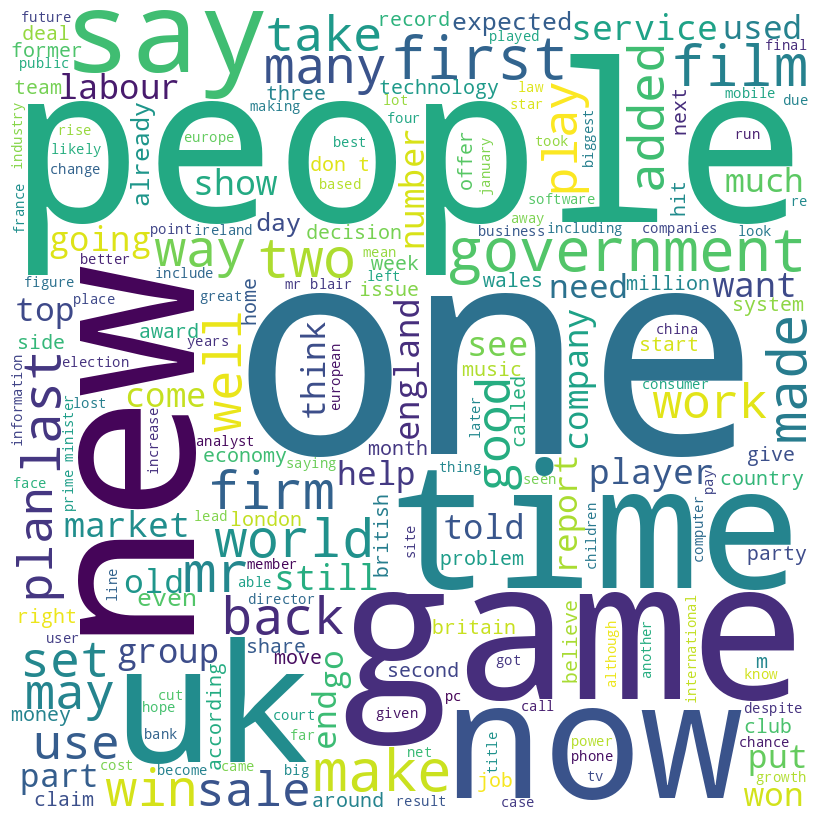

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(text_series, additional_stopwords=None, width=800, height=800, background_color='white', min_font_size=10):
    combined_text = ' '.join(text_series.astype(str).str.lower())

    stopwords = set(STOPWORDS)
    if additional_stopwords:
        stopwords.update(additional_stopwords)

    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        stopwords=stopwords,
        min_font_size=min_font_size
    ).generate(combined_text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
additional_stopwords = ["said", "will", "s", "us", "year"]
generate_wordcloud(train_data['Text'], additional_stopwords=additional_stopwords)

In [ ]:
import nltk
import subprocess

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import string
nltk.download('punkt')

nltk.download('stopwords')

def clean_text(doc):
    text = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    tokens = nltk.word_tokenize(text.lower())

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]

    return ' '.join(tokens)

train_data['clean_text'] = train_data['Text'].apply(lambda x: clean_text(x))

train_data[['Text', 'clean_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,clean_text
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launch defence lawyer defendin...
1,german business confidence slides german busin...,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,enron boss payout eighteen former enron direct...


In [42]:
train_data.to_csv('/cleaned_data.csv', index=False)

In [43]:
file_path = '/cleaned_data.csv'

# Read the CSV file into a DataFrame
clean_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(clean_data.head())

   ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

   text_length                                         clean_text  
0         1866  worldcom exboss launch defence lawyer defendin...  
1         2016  german business confidence slide german busine...  
2         3104  bbc poll indicates economic gloom citizen majo...  
3         3618  lifestyle governs mobile choice faster better ...  
4         2190  enron boss payout eighteen former enron direct...  


# New Section